09/15 데이터 시각화 복습 
Do It Pandas (p.81-119)  다시 필사 후 깃허브 제출

# 4. 그래프 그리기

## 4-1. 데이터 시각화가 필요한 이유

### 4-1-1. 앤스콤 4분할 그래프 살펴보기
- 앤스콤 4분할 그래프
대표적인 데이터 시각화. 영국의 프랭크 앤스콤이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프이다.

- 앤스콤이 지적한 함정과 데이터 시각화의 필요성
앤스콤 4분할 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며, 모든 데이터 그룹은 x, y열을 갖고 있다. 그런데 이 4개의 데이터 그룹은 평균과 분산, 상관관계, 회귀선이 같다는 특징이 있다. 만약 이런 결과만 본다면 '4개의 데이터 그룹은 모두 같을 것이다'라고 착각할 수 있다.


In [2]:
# 1. 앤스콤 데이터 집합 불러오기
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [3]:
# 2. matplotlib 라이브러리로 그래프 그리기
# %matplotlib notebook
import matplotlib.pyplot as plt

# 3. 첫 번째 데이터 그룹 추출
dataset_1 = anscombe[anscombe['dataset']=='I']

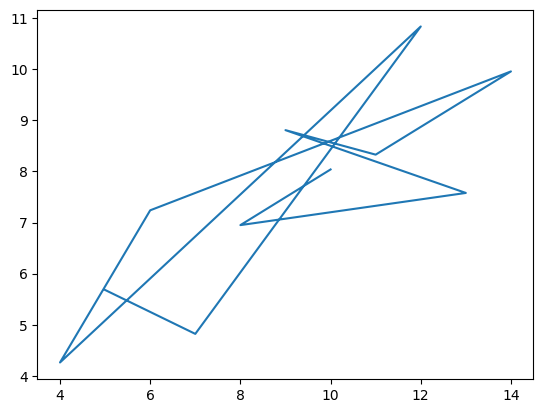

In [4]:
# 4. plot으로 선 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'])

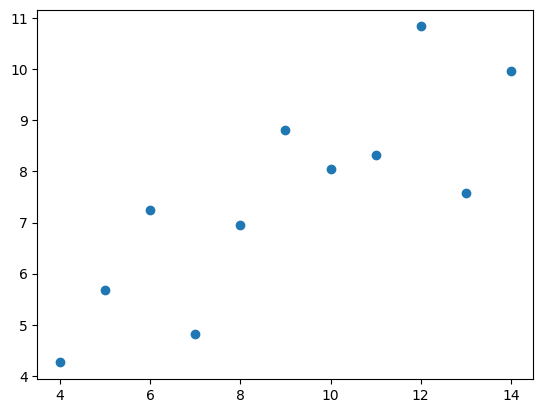

In [5]:
# 5. 점으로 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 4-1-2. 앤스콤 데이터 집합 모두 사용해 그래프 만들기

#### matplotlib 라이브러리로 그래프 그리기
1. 전체 그래프가 위치할 기본 틀을 만든다.
2. 그래프를 그려 넣을 그래프 격자를 만든다.
3. 격자에 그래프를 하나씩 추가한다. 추가되는 순서는 왼쪽에서 오론쪽 방향이다.
4. 만약 격자의 첫 번째 행이 꽉 차면 다음 행에 그래프를 그려 넣는다.

In [6]:
# 1. 앤스콤 dataset이 I, II, III, IV인 것을 추출하여 dataset_1234에 각각 저장한다.
dataset_2 = anscombe[anscombe['dataset']=='II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

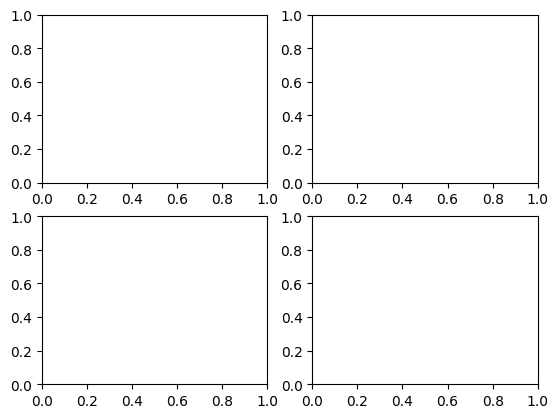

In [7]:
# 2. 그래프 격자가 위치할 기본 틀을 만든다.
fig = plt.figure()

# 3. add_subplots 메서드로 그래프 격자를 그린다.
# 기본 틀(fig)에 격자를 추가한다는 기분으로 add_subplot 메서드를 사용하면 된다.
# add_subplot의 첫 번째 인자에는 그래프 기본 틀의 행 크기를, 두 번째에는 열 크기를 지정한다.

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

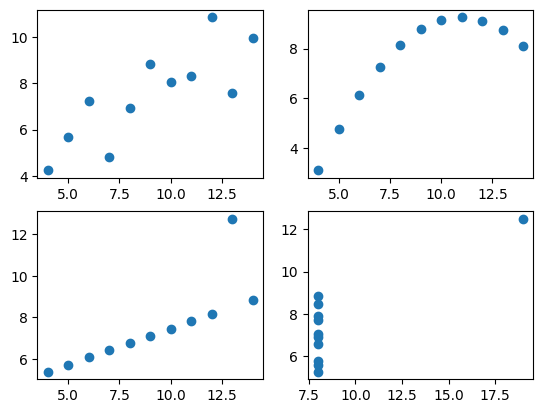

In [8]:
# 4. plot 메서드에 데이터를 전달하여 그래프를 그린다.
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

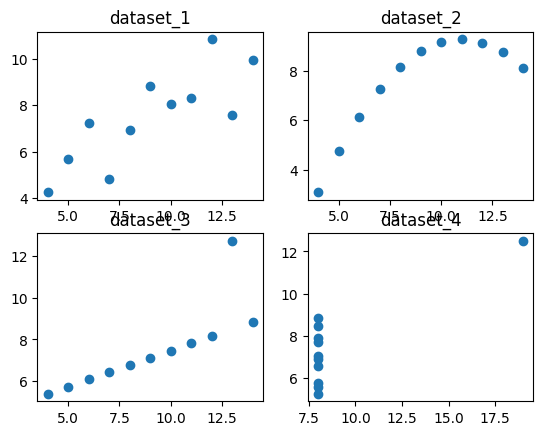

In [9]:
# 5. 제목 추가 : set_title()
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

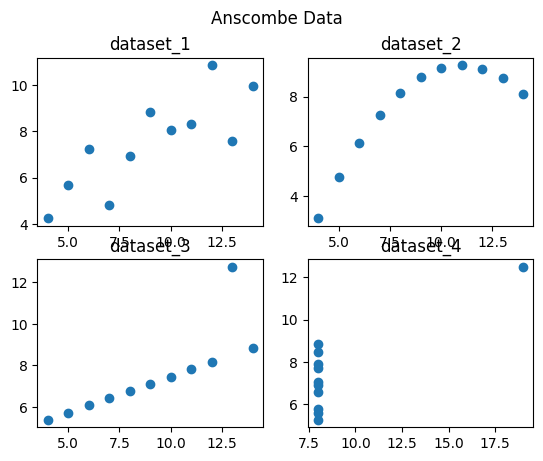

In [10]:
# 6. 기본 틀(fig)에 제목 추가
fig.suptitle("Anscombe Data")

fig

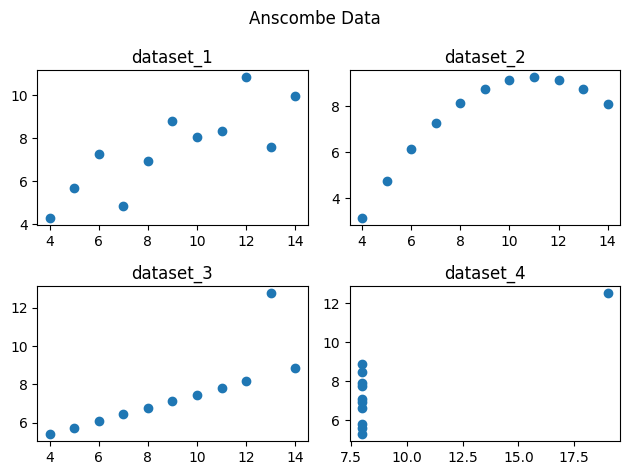

In [11]:
# 7. 레이아웃 조절 : tight_layout()
fig.tight_layout()

fig

## 4-2. matplotlib 라이브러리 자유자재로 사용하기

seaborn 라이브러리의 tips 데이터 집합을 이용하여 다양한 그래프를 그려보자

### 4-2-1. 기초 그래프 그리기

In [12]:
# 1. tips 불러오기
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


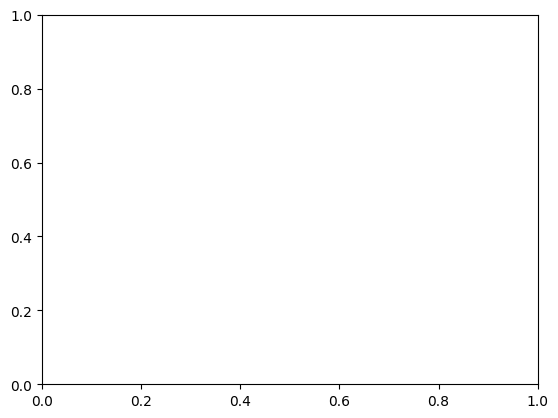

In [13]:
# 2. 히스토그램 (일변량 그래프)
# 3. plt로 히스토그램 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

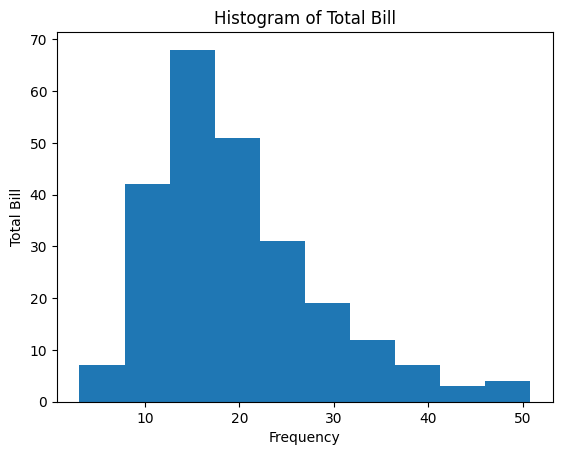

In [14]:
# 4. hist 메서드 이용
axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

Text(0, 0.5, 'Tip')

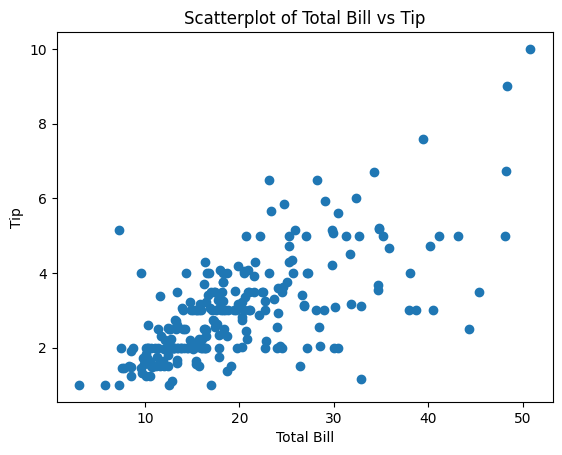

In [15]:
# 5. 산점도 그래프 그리기 (이변량 그래프)
# 6. scatter 메서드 이용
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

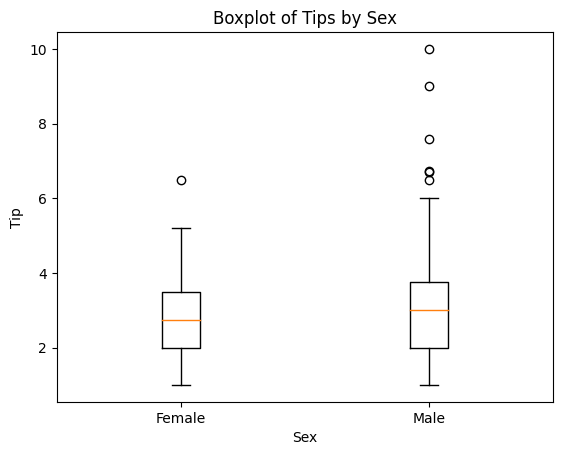

In [16]:
# 7. 박스 그래프 (이산형 변수 + 연속형 변수)
# 8. boxplot 메서드 이용 
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'],
               tips[tips['sex']=='Male']['tip']],
              labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel("Tip")
axes1.set_title('Boxplot of Tips by Sex')

### 4-2-2. 다변량 그래프 그리기

In [17]:
# 1. 산점도 그래프에 색상으로 성별 구분
# 문자열을 정수로 치환해야 함

def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [18]:
# 2. apply로 sex_color 추가
tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

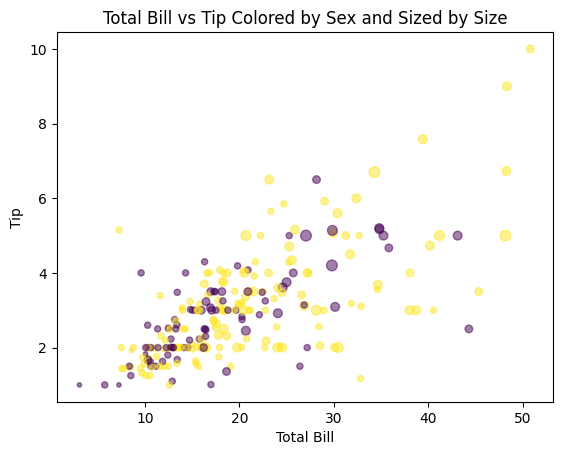

In [23]:
# 3. 테이블당 인원 수를 점의 크기로 표현하여 산점도에 추가
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x = tips['total_bill'], 
              y = tips['tip'], 
              s = tips['size']*10, 
              c = tips['sex_color'],
              alpha = 0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 4-3. seaborn 라이브러리 자유자재로 사용하기

In [24]:
# 1. seaborn 라이브러리 불러오기
import seaborn as sns
tips = sns.load_dataset("tips")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16348\1522074184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

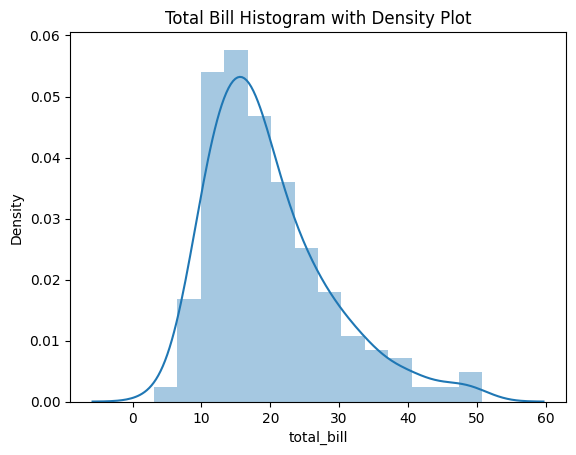

In [26]:
# 2. subplots, distplot 사용

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16348\3874644815.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde = False)


Text(0, 0.5, 'Frequency')

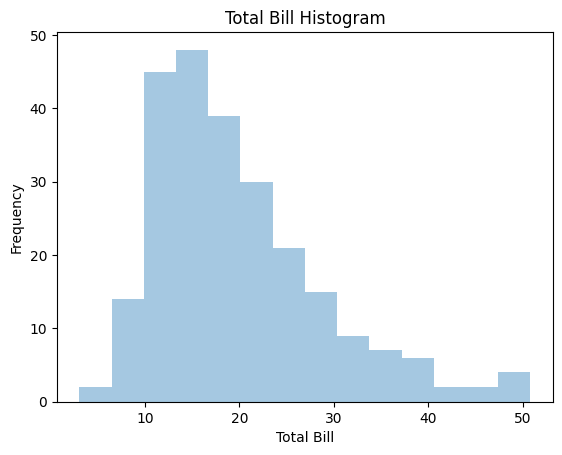

In [28]:
# 3. distplot에서 밀집도 그래프 제외 : kde = False

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel("Frequency")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16348\651819730.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], hist = False)


Text(0, 0.5, 'Unit Probability')

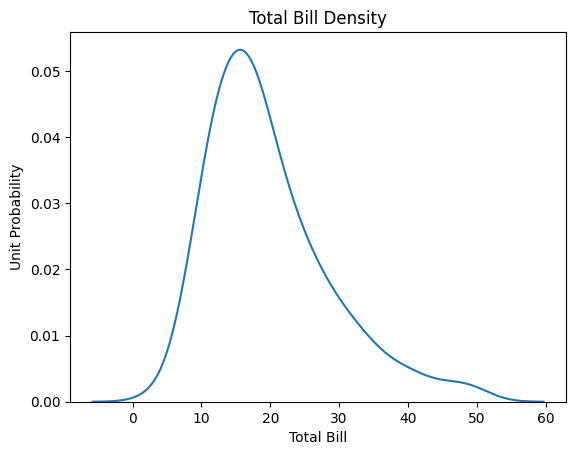

In [30]:
# 4. 밀집도 그래프만 나타내기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16348\1080675218.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug = True)


Text(0.5, 0, 'Total Bill')

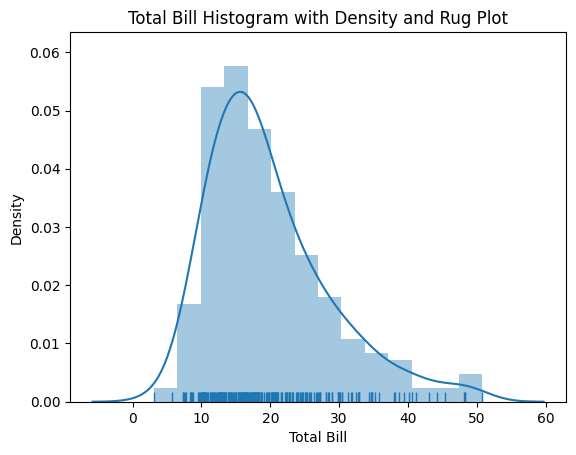

In [31]:
# 5. 양탄자 그래프도 추가하기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

Text(0, 0.5, 'Frequency')

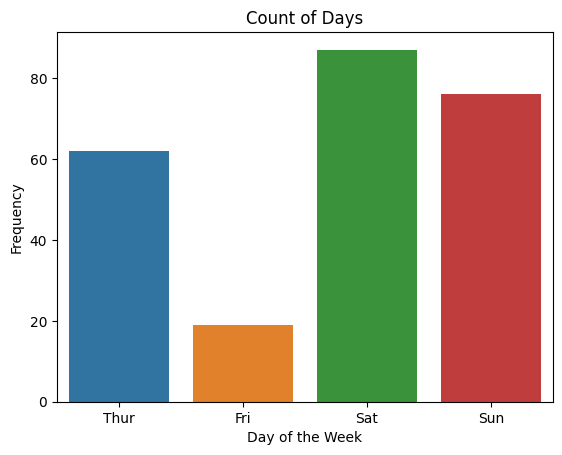

In [32]:
# 6. count 그래프
ax = plt.subplots()
ax = sns.countplot(x = 'day', data = tips)
ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### 4-3-2. 다양한 종류의 이변량 그래프 그리기

Text(0, 0.5, 'Tip')

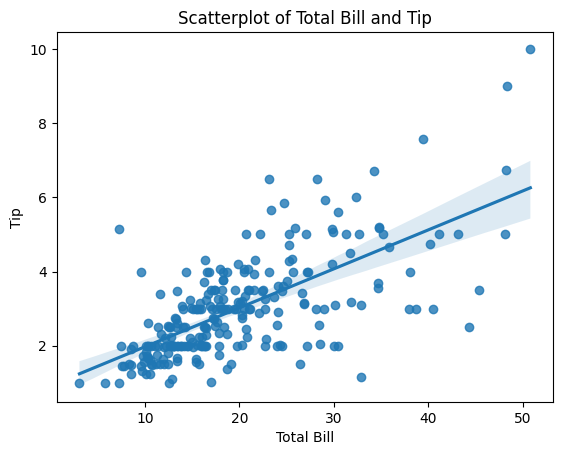

In [35]:
# 1. regplot = 산점도 + 회귀선
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips)
ax.set_title("Scatterplot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

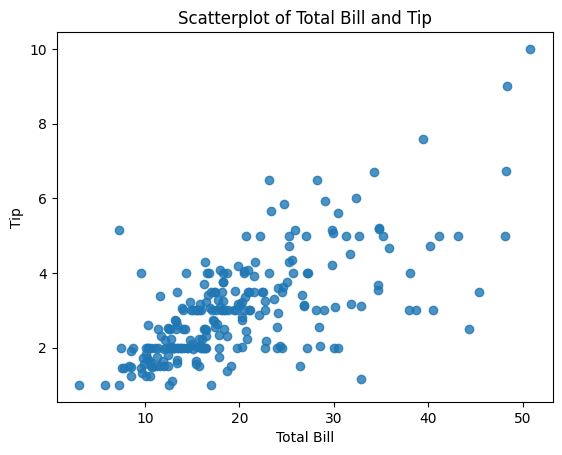

In [36]:
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips, fit_reg=False)
ax.set_title("Scatterplot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

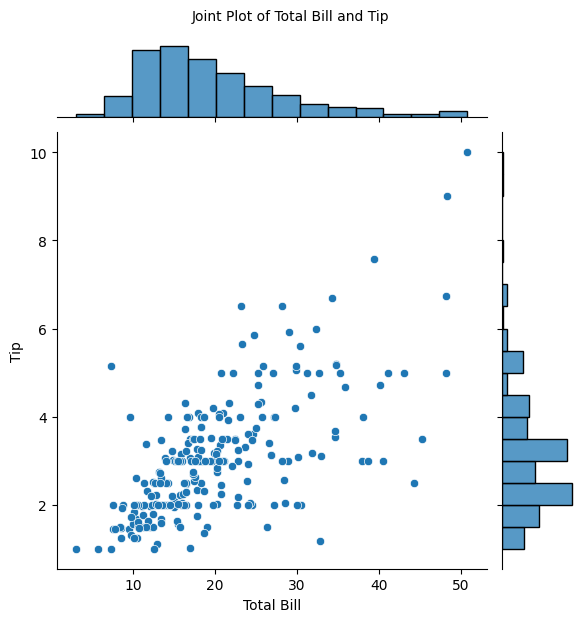

In [37]:
# 2. jointplot = 산점도 + 히스토그램
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

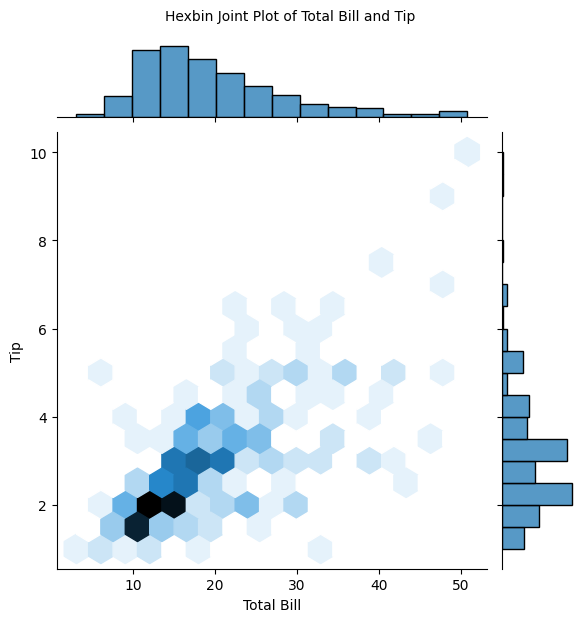

In [38]:
# 3. hexbin : 육각 그래프
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16348\3925875112.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],


Text(0, 0.5, 'Tip')

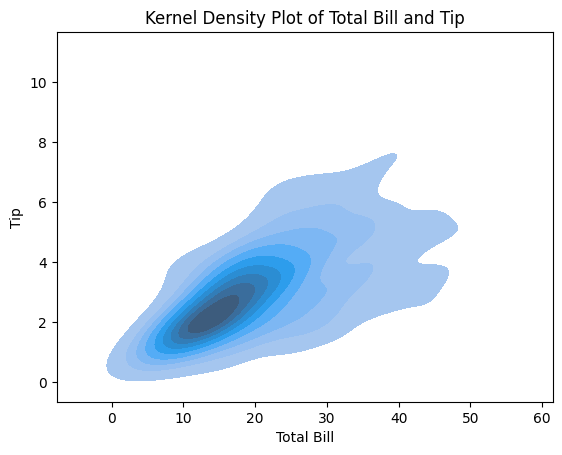

In [39]:
# 4. 이차원 밀집도 그리기 : kdeplot
ax = plt.subplots()
ax = sns.kdeplot(x=tips['total_bill'],
                 y=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total Bill')

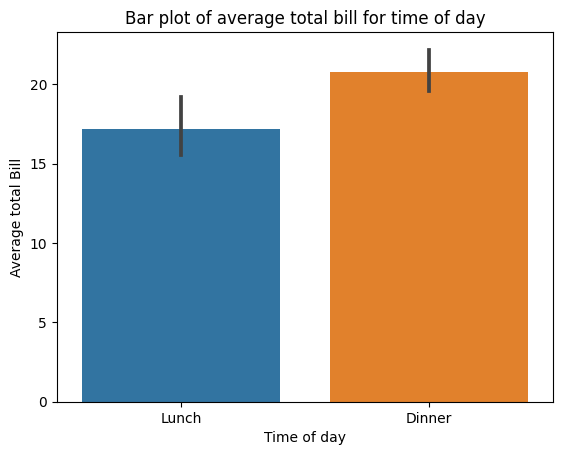

In [40]:
# 5. 바 그래프 그리기 : barplot
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total Bill')

Text(0, 0.5, 'Total Bill')

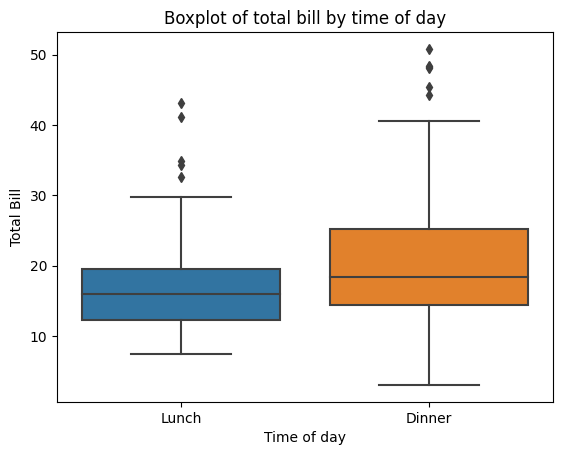

In [41]:
# 6. 박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

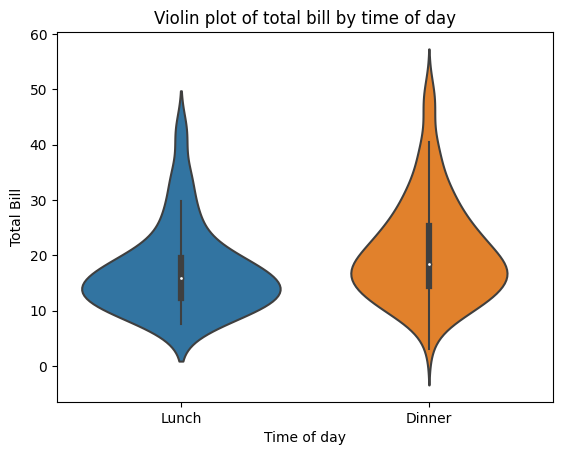

In [42]:
# 7. 바이올린 그래프 : 박스 그래프 + 커널 밀도
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title("Violin plot of total bill by time of day")
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

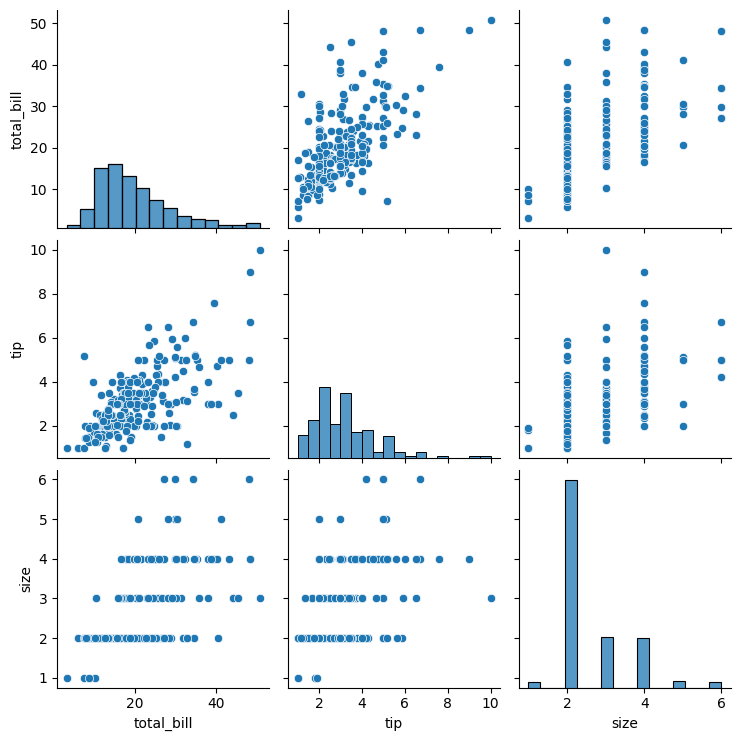

In [43]:
# 8. 관계 그래프 그리기 : pairplot
fig = sns.pairplot(tips)

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

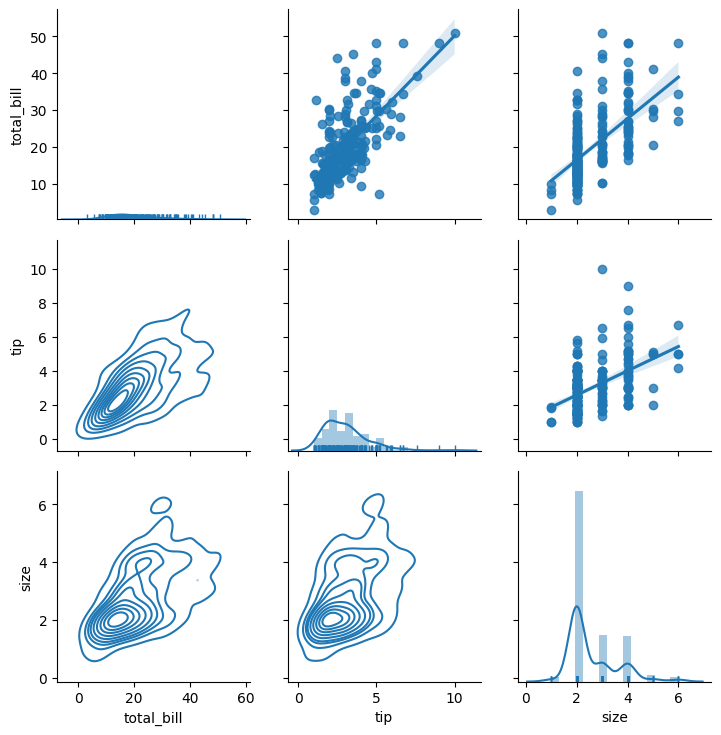

In [44]:
# 9. pairplot에서 중복되는 그래프 위치 정하기
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### 4-3-3. 다변량 그래프 그리기

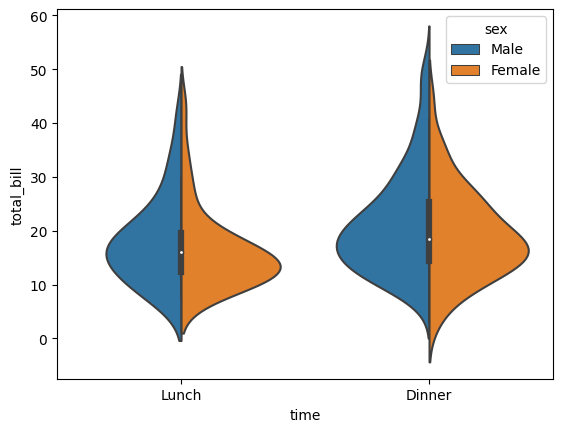

In [45]:
# 1. seaborn 라이브러리로 바이올린 그래프 그리기 - 색상 추가
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

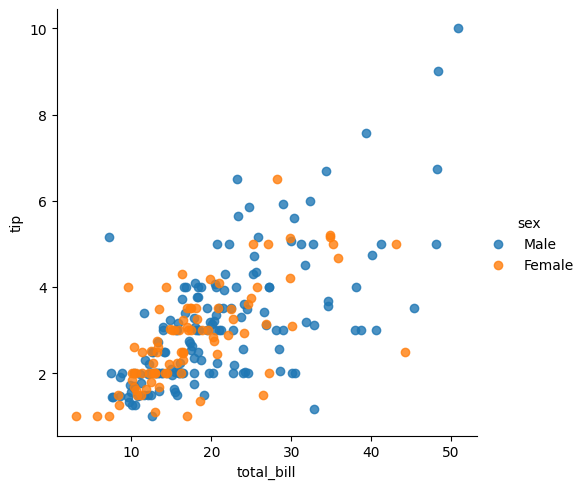

In [47]:
# 2. 산점도, 관계 그래프 그리기 - 색상 추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

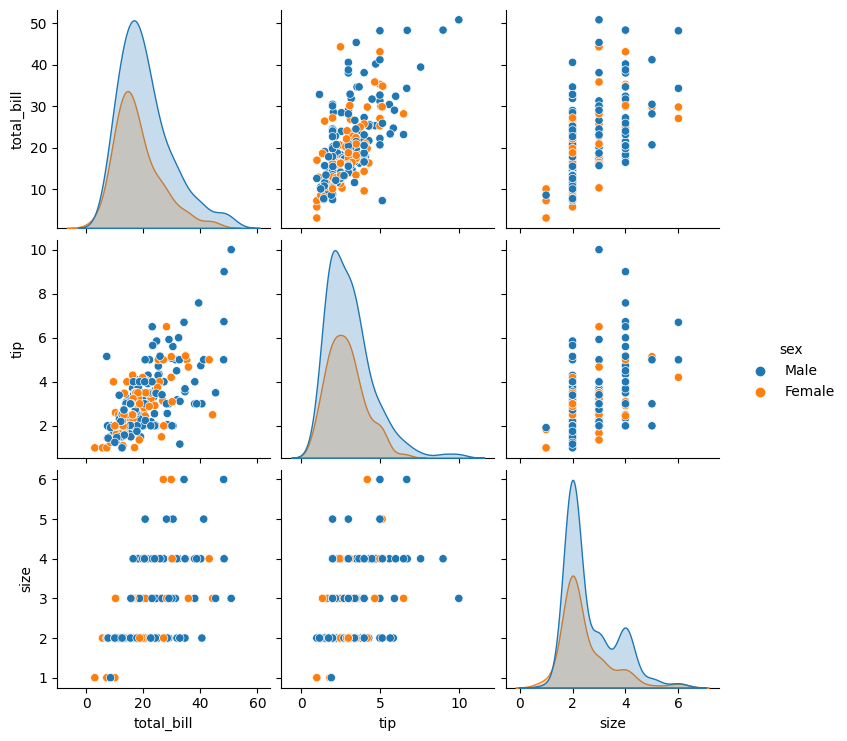

In [48]:
fig = sns.pairplot(tips, hue = 'sex')

In [ ]:
# 3. 산점도 그래프의 크기와 모양 조절하기
scatter = sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', scatter_kws={'s': tips['size']*10})

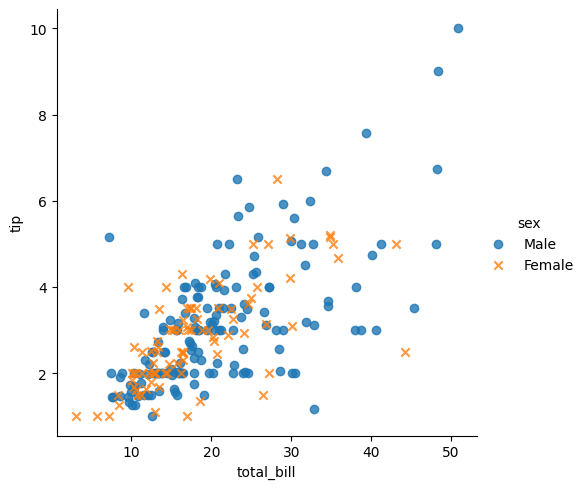

In [60]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'])

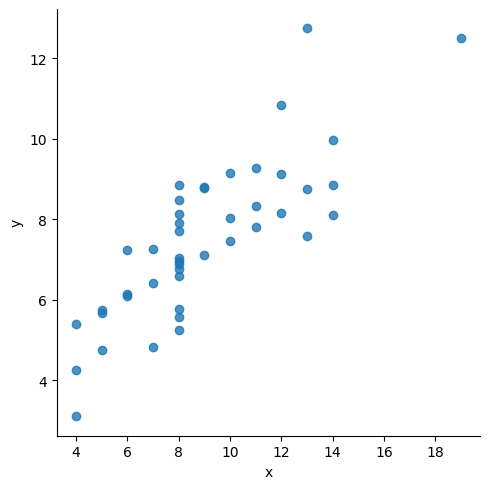

In [58]:
# 5. lmplot으로 4개의 데이터 그룹에 대해 한 번에 그래프 그리기
anscombe_plot = sns.lmplot(x='x', y='y', data = anscombe, fit_reg=False)

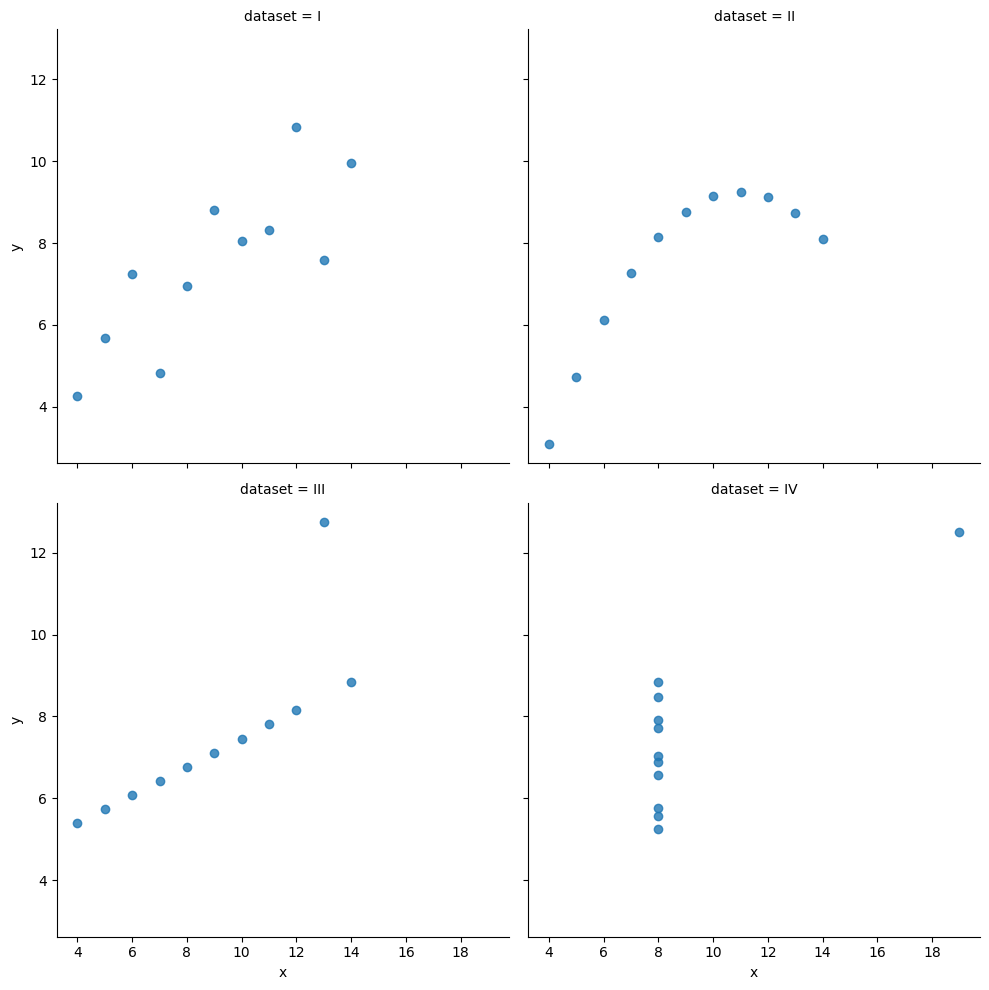

In [62]:
# 6. col, col_wrap
# col : 데이터 그룹을 구분할 열
# col_wrap : 그래프를 그릴 열의 수
anscombe_plot = sns.lmplot(x='x', y='y', data = anscombe, fit_reg=False, col='dataset', col_wrap=2)

## 4-4. 데이터 프레임과 시리즈로 그래프 그리기

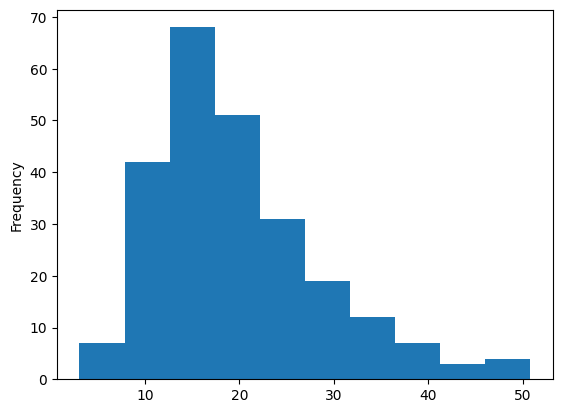

In [63]:
### 4-4-1. 데이터 프레임과 시리즈로 그래프 그리기
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

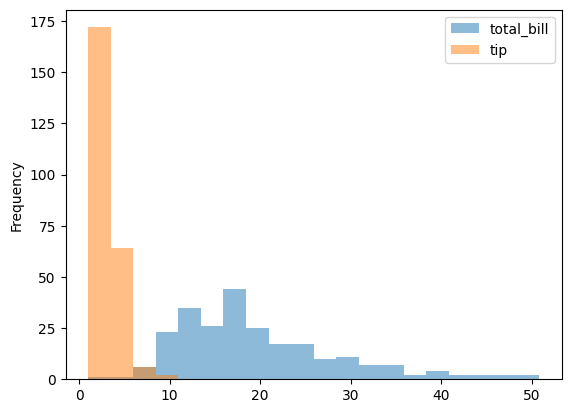

In [65]:
# 2. 투명도 조절 : alpha
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha = 0.5, bins = 20, ax = ax)

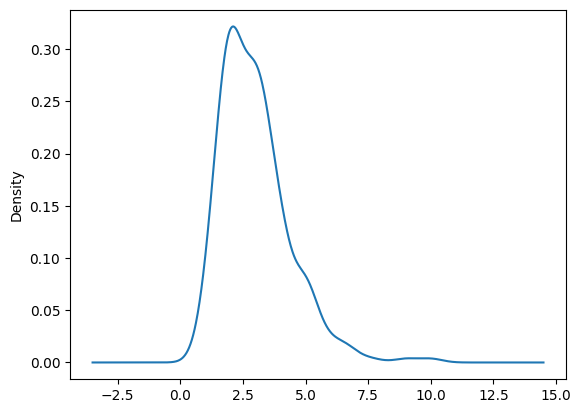

In [66]:
# 3. 밀집도, 산점도, 육각 그래프
ax = plt.figure()
ax = tips['tip'].plot.kde()

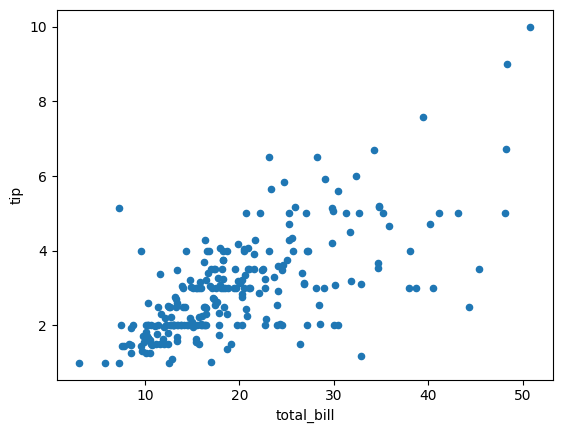

In [70]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax)

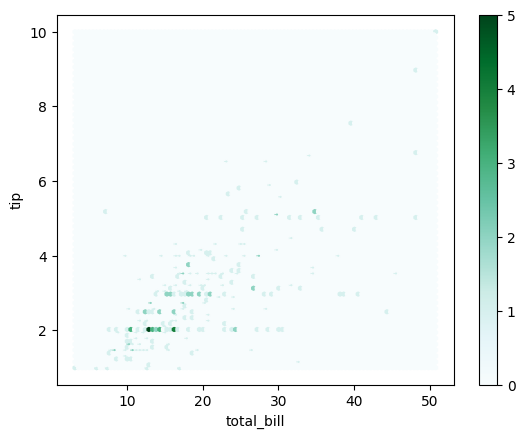

In [71]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

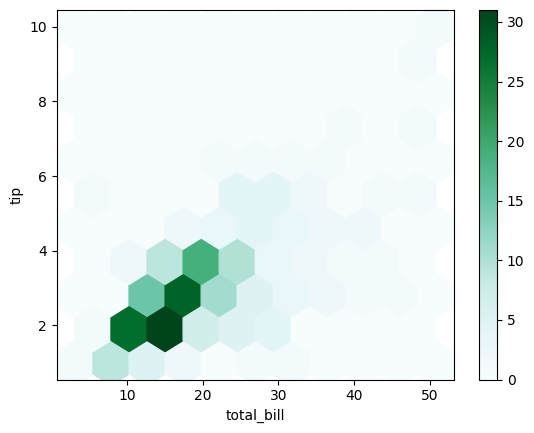

In [72]:
# 4. 육각 그래프 육각형 크기 변경 : gridsize()
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

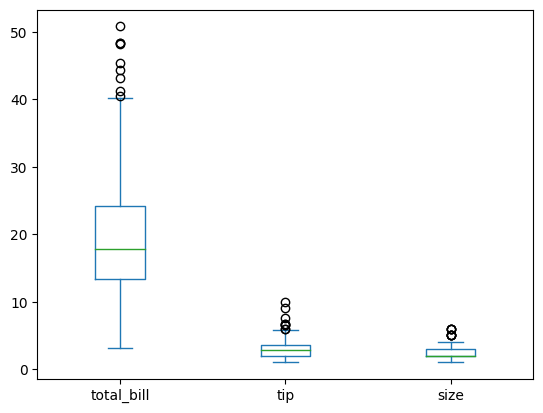

In [73]:
# 5. 박스 그래프
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

## 4-5. seaborn 라이브러리로 그래프 스타일 설정하기

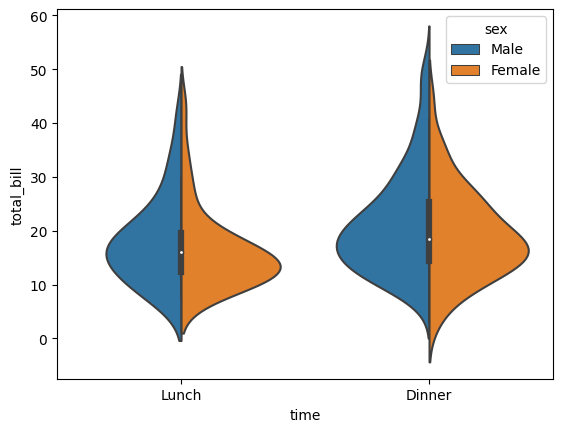

In [74]:
### 4-5-1. 그래프에 스타일 적용하기
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

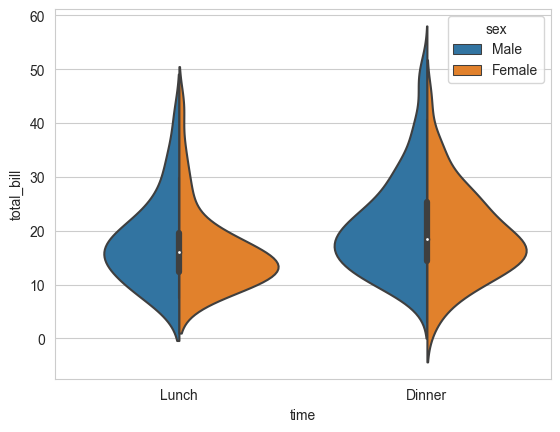

In [75]:
### 4-5-2. 배경에 가로줄 만들기
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

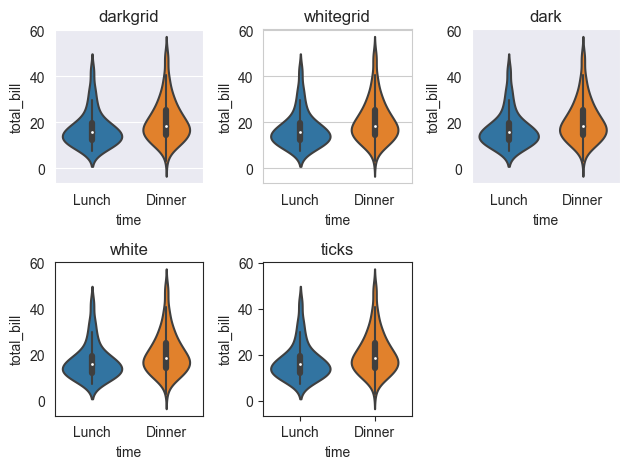

In [76]:
# 3. for문으로 모든 스타일을 하나씩 적용해보기
fig = plt.figure()
seaborn_styles=['darkgrid','whitegrid','dark','white','ticks']
for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2,3, plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)
fig.tight_layout()